### A function to instantly assess correlations between currencies and commodities

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
## importing data ##
dollar = pd.read_csv(r"C:\Users\avlbe\Desktop\Data Science\Datasets\pounddollarDATA.csv",skiprows=13,index_col=0)
dollar.index = pd.to_datetime(dollar.index)
dollar.columns = [c.replace(' ', '') for c in dollar.columns]

gold = pd.read_csv(r"C:\Users\avlbe\Desktop\Data Science\Datasets\goldDATA.csv",index_col=0)
gold.index = pd.to_datetime(gold.index)

brent_spot = pd.read_csv(r"C:\Users\avlbe\Desktop\Data Science\Datasets\EU_brent_spot.csv",skiprows=4,index_col=0)
brent_spot.rename(columns={'Europe Brent Spot Price FOB  Dollars per Barrel': 'dollars_per_barrel'}, inplace=True)
brent_spot.index = pd.to_datetime(brent_spot.index)

In [3]:
## preparing the data for the function ##
gold_filt = gold.groupby(gold.index.strftime('%Y-%m')).tail(1)
gold_10Y = gold_filt.sort_values(by="Date", ascending=True).last("10Y")

dollar_10Y = dollar.groupby(dollar.index.strftime('%Y-%m')).tail(1).last("10Y").sort_values(by="date", ascending=True)
value_inverse = 1/(dollar_10Y)
dollar_10Y["value_inverse"] = value_inverse

brent_10Y = brent_spot.groupby(brent_spot.index.strftime('%Y-%m')).tail(1).sort_values(by="Day", ascending=True).last("10Y")

In [8]:
## listing data so the globals() function can be used to locate the data in the function ##
a0 = [dollar_10Y.value, "USD price for 1 GBP"]
a1 = [dollar_10Y.value_inverse, "GBP price for 1 USD"]
a2 = [gold_10Y.Open, "Gold price"]
a3 = [brent_10Y.dollars_per_barrel, "Brent Spot Price (USD per barrel)"]

In [13]:
def plot(n,m):
    '''
    Returns two plots. First is the raw data against the year and second is the direct comparison with a linear fit.
    Codes are as follows:
    - 0: USD price for 1 GBP
    - 1: GBP price for 1 USD
    - 2: Gold price
    - 3: Brent Spot Price (USD per barrel)
    e.g. to see correlation between Gold price and Brent Spot Price, user would input plot(2,3)
    '''
    
    fig,ax = plt.subplots(figsize=(15,8))
    ax.set_title("Data from the last 10 years", fontsize=14)
    ax.plot(globals()[f'a{n}'][0],".-", label=""f"%s " % globals()[f'a{n}'][1])
    ax.grid(True)
    ax.set_xlabel("Year", fontsize = 14)
    ax.set_ylabel(""f"%s " % globals()[f'a{n}'][1], fontsize=14)
    ax.legend(loc="right")
    ax2=ax.twinx()
    ax2.plot(globals()[f'a{m}'][0],".-", color="Red", label=""f"%s " % globals()[f'a{m}'][1])
    ax2.set_ylabel(""f"%s " % globals()[f'a{m}'][1], fontsize=14)
    ax2.legend();
    
    slope = linregress(globals()[f'a{n}'][0], globals()[f'a{m}'][0]).slope
    c = linregress(globals()[f'a{n}'][0], globals()[f'a{m}'][0]).intercept
    rvalue = linregress(globals()[f'a{n}'][0], globals()[f'a{m}'][0]).rvalue
    x = np.linspace(np.min(globals()[f'a{n}'][0]),np.max(globals()[f'a{n}'][0]),100)

    plt.figure(figsize=(15,8))
    plt.plot(globals()[f'a{n}'][0], globals()[f'a{m}'][0],".", label="Data")
    plt.plot(x, slope*x + c, label="Linear fit")
    plt.grid(True)
    plt.xlabel(""f"%s " % globals()[f'a{n}'][1], fontsize=14)
    plt.ylabel(""f"%s " % globals()[f'a{m}'][1], fontsize=14)
    plt.title("Possible correlation over the last 10 years")
    plt.legend();

    print()
    print("The correlation coefficient is", rvalue)
    
    return

In [16]:
help(plot)

Help on function plot in module __main__:

plot(n, m)
    Returns two plots. First is the raw data against the year and second is the direct comparison with a linear fit.
    Codes are as follows:
    - 0: USD price for 1 GBP
    - 1: GBP price for 1 USD
    - 2: Gold price
    - 3: Brent Spot Price (USD per barrel)
    e.g. to see correlation between Gold price and Brent Spot Price, user would input plot(2,3)




The correlation coefficient is -0.3388816554628899


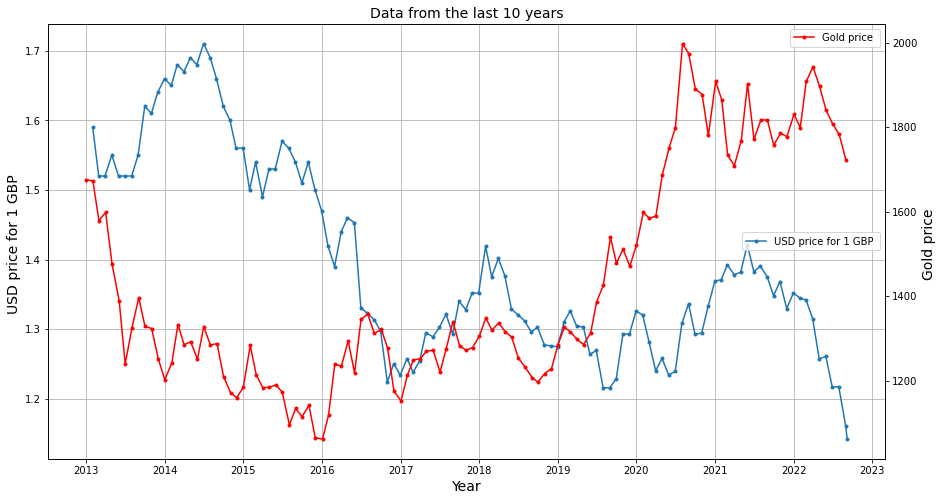

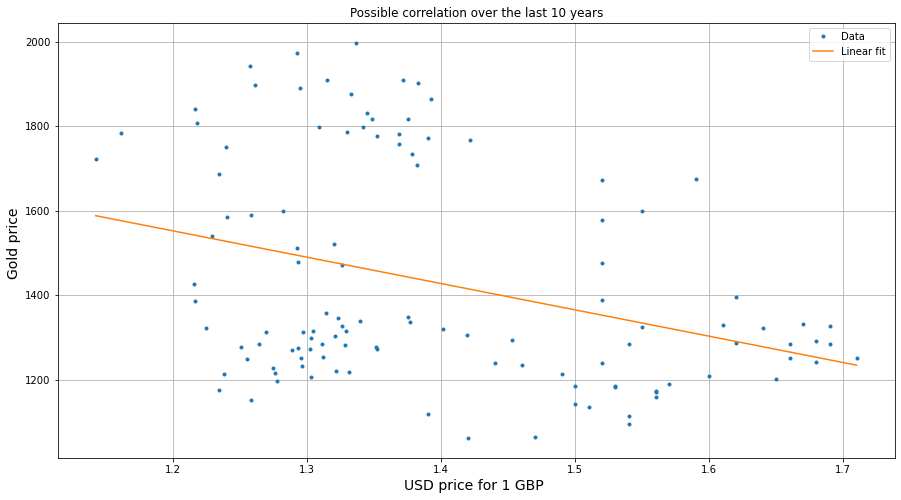

In [20]:
plot(0,2)